# Week 3 Notebook - Parametric Classification and Dimensionality Reduction 
(with Sentiment Analysis)

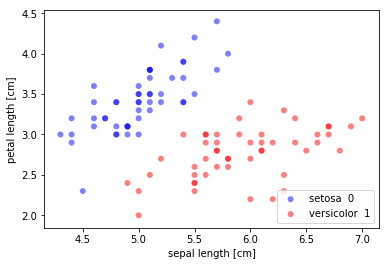

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


from mlclass2 import simplemetrics, plot_decision_2d_lda

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
X = df.iloc[0:100, [0,1]].values
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5)

stdscaler = preprocessing.StandardScaler().fit(X_train)
X_scaled  = stdscaler.transform(X)
X_train_scaled = stdscaler.transform(X_train)
X_test_scaled  = stdscaler.transform(X_test)

# plot data
plt.scatter(X[:50, 0], X[:50, 1],alpha=0.5, c='b', edgecolors='none', label='setosa %2s'%(y[0]))
plt.scatter(X[50:100, 0], X[50:100, 1],alpha=0.5, c='r', edgecolors='none', label='versicolor %2s'%(y[50]))
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='lower right')
plt.show()

We need to check to see if the dimesnions are normally distributed by checking scatter plots. We can also check the Shapiro-Wilks test, when the p-value is below 0.05, it is likely our data is NOT normally distributed.

Setosa Dimension 1 Shapiro-Wilks test p-value:  0.4595065116882324
Setosa Dimension 2 Shapiro-Wilks test p-value:  0.20465604960918427
Setosa Scatter Matrix


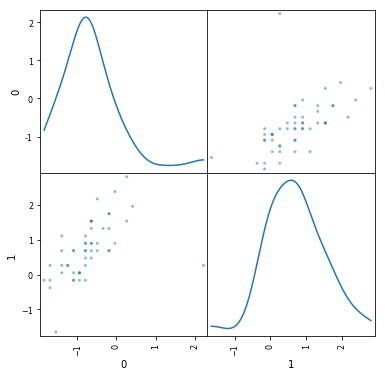

In [3]:
from scipy.stats import shapiro
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix
print("Setosa Dimension 1 Shapiro-Wilks test p-value: ", shapiro(X_scaled[0:50,0])[1])
print("Setosa Dimension 2 Shapiro-Wilks test p-value: ", shapiro(X_scaled[0:50,1])[1])
print("Setosa Scatter Matrix")
scatter_matrix(pd.DataFrame(X_scaled).loc[:50], alpha=0.5, figsize=(6, 6),diagonal='kde');

Setosa Dimension 1 Shapiro-Wilks test p-value:  0.46474820375442505
Setosa Dimension 2 Shapiro-Wilks test p-value:  0.3379843533039093
Versicolor Scatter Matrix [[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BB6A7B8>


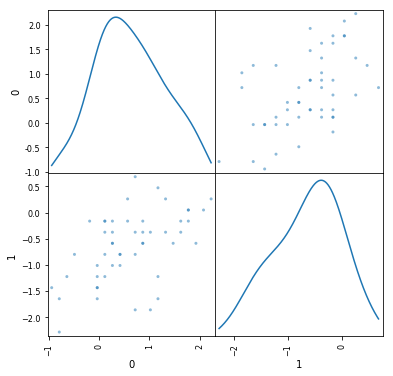

In [4]:
print("Setosa Dimension 1 Shapiro-Wilks test p-value: ", shapiro(X_scaled[50:100,0])[1])
print("Setosa Dimension 2 Shapiro-Wilks test p-value: ", shapiro(X_scaled[50:100,1])[1])
print("Versicolor Scatter Matrix", scatter_matrix(pd.DataFrame(X_scaled).loc[50:100], alpha=0.5, figsize=(6, 6), diagonal='kde'));

## Quadratic Discriminant Analysis on Iris

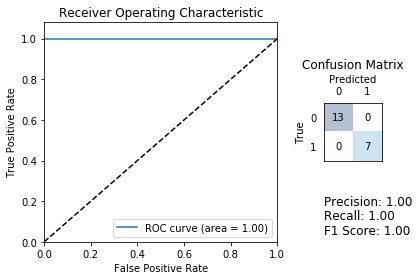

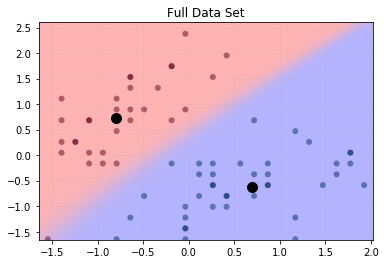

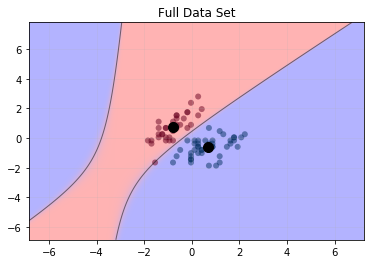

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)
predicted = qda.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d_lda(qda,X_train_scaled,y_train,padding=-0.2,discriminant=False,title="Full Data Set",lda_on=True)
plot_decision_2d_lda(qda,X_train_scaled,y_train,padding=5,discriminant=True,title="Full Data Set",lda_on=True)

## Linear Discriminant on Iris

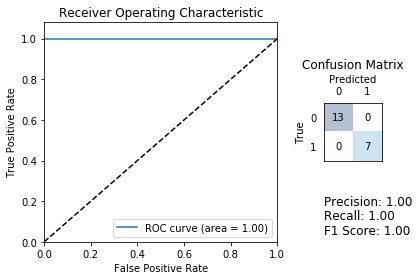

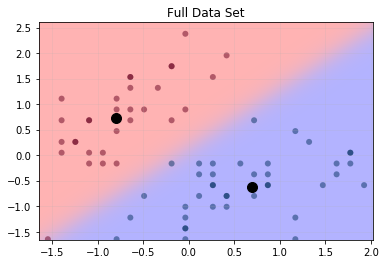

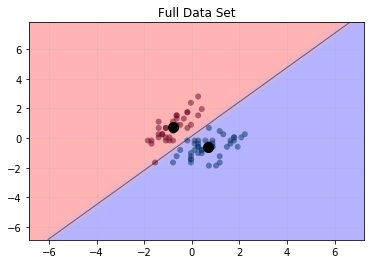

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
predicted = lda.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d_lda(lda,X_train_scaled,y_train,padding=-0.2,discriminant=False,title="Full Data Set",lda_on=True)
plot_decision_2d_lda(lda,X_train_scaled,y_train,padding=5,discriminant=True,title="Full Data Set",lda_on=True)

## Gaussian Naive Bayes on Iris

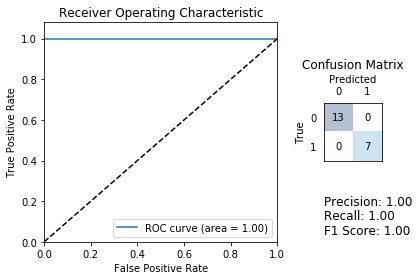

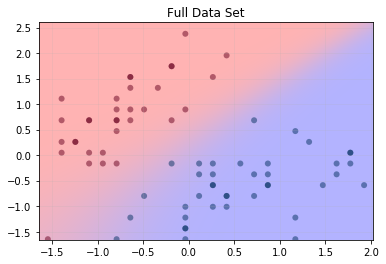

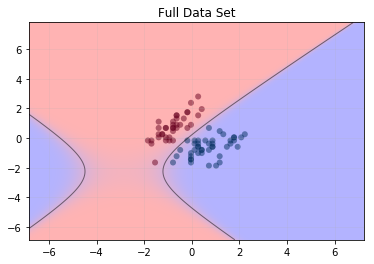

In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
predicted = gnb.predict(X_test_scaled)
simplemetrics(y_test,predicted)
plot_decision_2d_lda(gnb,X_train_scaled,y_train,padding=-0.2,discriminant=False,title="Full Data Set",lda_on=False)
plot_decision_2d_lda(gnb,X_train_scaled,y_train,padding=5,discriminant=True,title="Full Data Set",lda_on=False)

# Sentiment Analysis using Naive Bayes

In this example, we will work on a big data machine learning problem: predicting the sentiment of movie reviews using Multinomial Naive Bayes. The source of these notebooks is chapter 8 in Rashka and the following blog post:
<a href="http://radimrehurek.com/data_science_python/">Practical Data Science in Python: Spam Filter</a>

In [9]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

np.random.seed(47)

reviews = pd.read_csv('./movie_data.csv')
print(reviews.head())
print(reviews.tail())

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1
                                                  review  sentiment
49995  Towards the end of the movie, I felt it was to...          0
49996  This is the kind of movie that my enemies cont...          0
49997  I saw 'Descent' last night at the Stockholm Fi...          0
49998  Some films that you pick up for a pound turn o...          0
49999  This is one of the dumbest films, I've ever se...          0


We need to remove HTML tags from the data.

In [10]:
reviews.loc[3][0]

"I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a dime a dozen, but this one stands out. <br /><br />This is one I'd recommend to anyone."

In [11]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [12]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [13]:
reviews['review'] = reviews['review'].apply(preprocessor)

In [14]:
reviews.loc[3][0]

'i saw this film in a sneak preview and it is delightful the cinematography is unusually creative the acting is good and the story is fabulous if this movie does not do well it won t be because it doesn t deserve to before this film i didn t realize how charming shia lebouf could be he does a marvelous self contained job as the lead there s something incredibly sweet about him and it makes the movie even better the other actors do a good job as well and the film contains moments of really high suspense more than one might expect from a movie about golf sports movies are a dime a dozen but this one stands out this is one i d recommend to anyone '

We also need to randomize the order of reviews.

In [15]:
import numpy as np

reviews = reviews.reindex(np.random.permutation(reviews.index))

print(reviews.head())
print(reviews.tail())

                                                  review  sentiment
48243  i just watched this film 15 minutes ago and i ...          0
48967  dave devon sawa and his friends sam jason sege...          0
36155  this is one of the funniest movies i have ever...          1
11305  i read a viciously hidden remarks on a previou...          1
23749  this film is just another waste of time the pl...          0
                                                  review  sentiment
25267  genre dinosaur animation new york time travel ...          1
23112  although i had previously watched this one som...          0
11528  jean pierre melville s le cercle rouge follows...          1
47431  i agree with most of the columbo fans that thi...          0
38023  quite honestly the omega code is the worst mov...          0


## Basic Stats

With `pandas`, we can also view aggregate statistics easily:

In [16]:
reviews.groupby('sentiment').describe()

review                                                            \
           count unique                                                top   
sentiment                                                                    
0          25000  24695  i see that c thomas howell has appeared in man...   
1          25000  24882  loved today s show it was a variety and not so...   

                
          freq  
sentiment       
0            3  
1            5

How long are the messages?

In [17]:
reviews['length'] = reviews['review'].map(lambda text: len(text))
print(reviews.head())

                                                  review  sentiment  length
48243  i just watched this film 15 minutes ago and i ...          0    1326
48967  dave devon sawa and his friends sam jason sege...          0    1036
36155  this is one of the funniest movies i have ever...          1     306
11305  i read a viciously hidden remarks on a previou...          1     748
23749  this film is just another waste of time the pl...          0     600


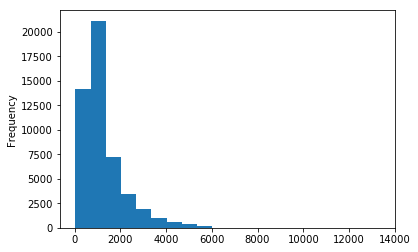

In [18]:
reviews.length.plot(bins=20, kind='hist')

In [19]:
reviews.length.describe()

count    50000.000000
mean      1253.940420
std        947.537389
min         31.000000
25%        672.000000
50%        930.000000
75%       1521.000000
max      13335.000000
Name: length, dtype: float64

What are some short reviews?

In [20]:
print(list(reviews.review[reviews.length < 60].index))
print(list(reviews.review[reviews.length < 60]))

[17466, 23467, 19607, 21705, 21499, 38568, 41479]
['i hope this group of film makers never re unites ', 'more suspenseful more subtle much much more disturbing ', 'primary plot primary direction poor interpretation ', 'what a script what a story what a mess ', 'read the book forget the movie ', 'this movie is terrible but it has some good effects ', 'i wouldn t rent this one even on dollar rental night ']


Is there any difference in message length between positive and negative reviews?

Wall time: 145 ms


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C9C3080>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000CB59978>], dtype=object)

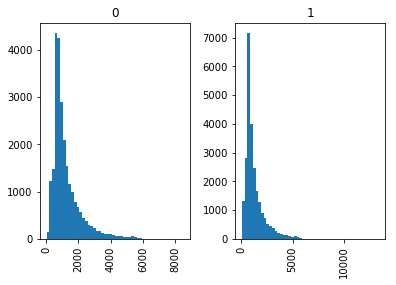

In [21]:
%%time
reviews.hist(column='length', by='sentiment', bins=50)

## Bag of Words

In this section we'll massage the raw messages (sequence of characters) into vectors (sequences of numbers).

The mapping is not 1-to-1; we'll use the [bag-of-words](http://en.wikipedia.org/wiki/Bag-of-words_model) approach, where each unique word in a text will be represented by one number.

As a first step, let's write a function that will split a message into its individual words:

In [22]:
def split_into_tokens(review):
    review = str(review) # convert bytes into proper unicode
    return TextBlob(review).words

Here are some of the original texts again:
    

In [23]:
reviews.review.head()

48243    i just watched this film 15 minutes ago and i ...
48967    dave devon sawa and his friends sam jason sege...
36155    this is one of the funniest movies i have ever...
11305    i read a viciously hidden remarks on a previou...
23749    this film is just another waste of time the pl...
Name: review, dtype: object

...and here are the same messages, tokenized:

In [24]:
import nltk
nltk.download('punkt')

reviews.review.head().apply(split_into_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


48243    [i, just, watched, this, film, 15, minutes, ag...
48967    [dave, devon, sawa, and, his, friends, sam, ja...
36155    [this, is, one, of, the, funniest, movies, i, ...
11305    [i, read, a, viciously, hidden, remarks, on, a...
23749    [this, film, is, just, another, waste, of, tim...
Name: review, dtype: object

NLP questions:

1. Do capital letters carry information?
2. Does distinguishing inflected form ("goes" vs. "go") carry information?
3. Do interjections, determiners carry information?

In other words, we want to better "normalize" the text.

With textblob, we'd detect [part-of-speech (POS)](http://www.ling.upenn.edu/courses/Fall_2007/ling001/penn_treebank_pos.html) tags with:

In [25]:
import nltk
nltk.download('averaged_perceptron_tagger')

TextBlob("hello world, how is it going?").tags  # list of (word, POS) pairs

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

remove stopwords and normalize words into their base form ([lemmas](http://en.wikipedia.org/wiki/Lemmatisation)) with:

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [27]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [28]:
import nltk
nltk.download('wordnet')
def split_into_lemmas(review):
    review = str(review).lower()
    words = TextBlob(review).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

reviews.review.head().apply(split_into_lemmas)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


48243    [watched, film, 15, minute, ago, still, idea, ...
48967    [dave, devon, sawa, friend, sam, jason, segel,...
36155    [one, funniest, movie, ever, seen, know, real,...
11305    [read, viciously, hidden, remark, previous, co...
23749    [film, another, waste, time, plot, ridiculous,...
Name: review, dtype: object

## Data to vectors

Now we'll convert each message, represented as a list of tokens (lemmas) above, into a vector that machine learning models can understand.

Doing that requires essentially three steps, in the bag-of-words model:

1. counting how many times does a word occur in each message (term frequency)
2. weighting the counts, so that frequent tokens get lower weight (inverse document frequency)
3. normalizing the vectors to unit length, to abstract from the original text length (L2 norm)

Each vector has as many dimensions as there are unique words in the reviews corpus:

**Note: This will take while.**

In [32]:
%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(reviews['review'])
print(len(bow_transformer.vocabulary_))

94247
Wall time: 3min 55s


Here we used `scikit-learn` (`sklearn`), a powerful Python library for teaching machine learning. It contains a multitude of various methods and options.

Let's take one text message and get its bag-of-words counts as a vector, putting to use our new `bow_transformer`:

In [30]:
review4 = reviews['review'][17466]
print(review4)

i hope this group of film makers never re unites 


In [31]:
bow4 = bow_transformer.transform([review4])
print(bow4)

  (0, 30662)	1
  (0, 36104)	1
  (0, 39593)	1
  (0, 51011)	1
  (0, 57511)	1
  (0, 87637)	1


The bag-of-words counts for the entire reviews corpus are a large, sparse matrix:

**Note: The following will take about as long as the last long cell. **

In [33]:
%%time
reviews_bow = bow_transformer.transform(reviews['review'])
print('sparse matrix shape:', reviews_bow.shape)
print('number of non-zeros:', reviews_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * reviews_bow.nnz / (reviews_bow.shape[0] * reviews_bow.shape[1])))

sparse matrix shape: (50000, 94247)
number of non-zeros: 4803614
sparsity: 0.10%
Wall time: 3min 41s


## Train-Test Split

Then we split the reviews and their sentiment label into training and testing sets, using the first 40,000 reviews for training and the remaining for testing.

In [34]:
reviews_bow_train = reviews_bow[:40000]
reviews_bow_test = reviews_bow[40000:]
reviews_sentiment_train = reviews['sentiment'][:40000]
reviews_sentiment_test = reviews['sentiment'][40000:]

print(reviews_bow_train.shape)
print(reviews_bow_test.shape)

(40000, 94247)
(10000, 94247)


There are a multitude of ways in which data can be proprocessed and vectorized. These two steps, also called "feature engineering", are typically the most time consuming and "un-fun" parts of building a predictive pipeline, but they are very important and require some experience. The trick is to evaluate constantly: analyze model for the errors it makes, improve data cleaning & preprocessing, brainstorm for new features, evaluate...

## Training a model, finding sentiment

With messages represented as vectors, we can finally train our sentiment classifier.

We'll be using scikit-learn here, choosing the [Naive Bayes](http://en.wikipedia.org/wiki/Naive_Bayes_classifier) classifier to start with:

In [35]:
%time review_sentiment = MultinomialNB().fit(reviews_bow_train, reviews_sentiment_train)

Wall time: 58.9 ms


Let's try classifying our single random message:

In [36]:
print('predicted:', review_sentiment.predict(bow4)[0])
print('expected:', reviews.sentiment[17466])

predicted: 0
expected: 0


Hooray! You can try it with your own texts, too.

A natural question is to ask, how many messages do we classify correctly overall?

In [37]:
predictions = review_sentiment.predict(reviews_bow_test)
print(predictions)

[0 0 1 ..., 1 1 0]


In [38]:
print('accuracy', accuracy_score(reviews_sentiment_test, predictions))
print('confusion matrix\n', confusion_matrix(reviews_sentiment_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.8618
confusion matrix
 [[4395  603]
 [ 779 4223]]
(row=expected, col=predicted)


From this confusion matrix, we can compute precision and recall or F1:

In [39]:
print(classification_report(reviews_sentiment_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.88      0.86      4998
          1       0.88      0.84      0.86      5002

avg / total       0.86      0.86      0.86     10000



We can test the system to verify it works for new reviews:

In [40]:
def predict_review(new_review): 
    new_sample = bow_transformer.transform([new_review])
    print(new_review, np.around(review_sentiment.predict_proba(new_sample), decimals=5),"\n")

predict_review('Horrible. Terrible. Dreadful. Awful. Pile of garbage. Junk.')
predict_review('Fantastic. Amazing. Terrific. Classic. Best! Extraordinary. Authentic. Ideal. Vibrant. Powerful. Perfect. Imaginative. Incredible. Happy. Love. Pleasure.')
predict_review('Okay. Great.')

Horrible. Terrible. Dreadful. Awful. Pile of garbage. Junk. [[ 1.  0.]] 

Fantastic. Amazing. Terrific. Classic. Best! Extraordinary. Authentic. Ideal. Vibrant. Powerful. Perfect. Imaginative. Incredible. Happy. Love. Pleasure. [[ 0.  1.]] 

Okay. Great. [[ 0.49974  0.50026]] 



In [41]:
predict_review('Sharknado is the best movie of the century. \
 The lighting, the acting, the cinematography. All were magnificent. \
 I shall not see another movie as exceptional as this in my life time.')
predict_review('Murray, with his curious blend of pathos and aggressiveness, is terrific, and so is an acutely uptight Dreyfuss, never once copping a plea for our sympathy.')
predict_review('Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz\'s antic direction calls for hand-waving hysteria.')
predict_review('To say that the movie loses the plot would not be strictly accurate, for that would imply that there was a plot to lose.')

Sharknado is the best movie of the century.  The lighting, the acting, the cinematography. All were magnificent.  I shall not see another movie as exceptional as this in my life time. [[ 0.02608  0.97392]] 

Murray, with his curious blend of pathos and aggressiveness, is terrific, and so is an acutely uptight Dreyfuss, never once copping a plea for our sympathy. [[ 0.01501  0.98499]] 

Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz's antic direction calls for hand-waving hysteria. [[ 0.06518  0.93482]] 

To say that the movie loses the plot would not be strictly accurate, for that would imply that there was a plot to lose. [[ 0.94552  0.05448]] 



# Dimensionality Reduction

In [42]:
import pandas as pd

df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [43]:
df_wine['Class label'].unique()

array([1, 2, 3], dtype=int64)

In [44]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Sequential feature selection algorithms: Backward Selection

In [46]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

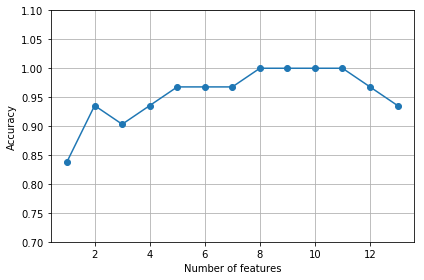

In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

# selecting features
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)

# plotting performance of feature subsets
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
# plt.savefig('./sbs.png', dpi=300)
plt.show()

In [48]:
k5 = list(sbs.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Malic acid', 'Proanthocyanins', 'Color intensity',
       'Proline'],
      dtype='object')


In [49]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 0.944444444444


In [50]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 1.0
Test accuracy: 1.0


## Principle Component Analysis

In [51]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([ 0.37329648,  0.18818926,  0.10896791,  0.07724389,  0.06478595,
        0.04592014,  0.03986936,  0.02521914,  0.02258181,  0.01830924,
        0.01635336,  0.01284271,  0.00642076])

### Total and Explained Variance

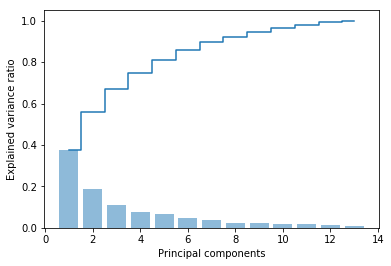

In [52]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

In [53]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

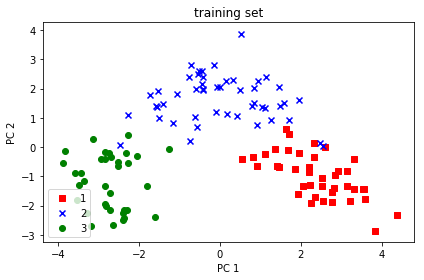

In [54]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
plt.title('training set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

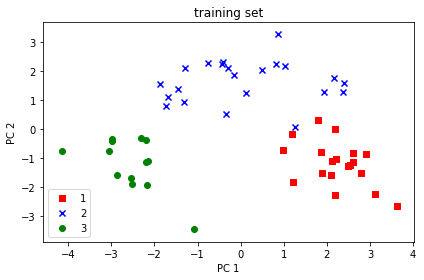

In [55]:
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_test), colors, markers):
    plt.scatter(X_test_pca[y_test == l, 0], 
                X_test_pca[y_test == l, 1], 
                c=c, label=l, marker=m)
plt.title('training set')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

## <span style="color:red">Programming Assignment 3: Disaster Detector/Install Keras and Theano</span>

In this section of the notebook, implement using the <a href="https://www.crowdflower.com/data-for-everyone/">"Disasters on social media"</a> dataset from Crowdflower with the code presented in the Multinomial Naive Bayes section above. 

Recall that in Pandas, you subset a dataframe with square brackets after the dataframe name, this code selects the class column from the tweets dataframe:
<code>tweets['class']</code>

I start you off with code that imports the dataset.

You need to complete the following steps:

1. Remove any HTML and Emoticons from the tweets. 
2. Reindex the tweets dataframe so the rows are in random order.
3. Download stopwords from the NLTK, remove them from the tweets.
4. Create a bag-of-words for the tweets. Convert the words to lemmas and remove any stop words.
5. Split the tweets into a training and testing set, using the first 8000 tweets for training and the remaining for testing. (Do not use Scikit-learn, use the code presented above to subset the data.)
6. Apply Multinomial Naive Bayes model, show the precision and recall scores for the positive and negative classes.
7. Test your model with some text.

On testing your model, you should get results similar to this:

<code>Cat stuck in a tree. [[ 0.28597  0.71403]] 
Car accident. Major damage to property. [[ 0.22223  0.77777]] 
I ate a sandwich last night. [[ 0.97343  0.02657]] 
Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz's antic direction calls for hand-waving hysteria. [[ 0.9916  0.0084]] </code>

In [57]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

tweets = pd.read_csv('socialmedia-disaster-tweets-DFE.csv',encoding='latin1')[['text','choose_one']]
tweets.columns = ['tweet','class']
tweets = tweets[(tweets['class'] == 'Relevant') | (tweets['class'] == 'Not Relevant')]
tweets = tweets.reset_index(drop=True)
tweets.tail()

,tweet,class
10855,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,Relevant
10856,Police investigating after an e-bike collided ...,Relevant
10857,The Latest: More Homes Razed by Northern Calif...,Relevant
10858,MEG issues Hazardous Weather Outlook (HWO) htt...,Relevant
10859,#CityofCalgary has activated its Municipal Eme...,Relevant


In [58]:
tweets.loc[3][0]

'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all'

In [68]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [69]:
preprocessor("</a>This :) is :( a test :-)!")

'this is a test :) :( :)'

In [70]:
tweets['tweet'] = tweets['tweet'].apply(preprocessor)

In [61]:
tweets.loc[3][0]

'there is a forest fire at spot pond geese are fleeing across the street i cannot save them all'

In [62]:
tweets = tweets.reindex(np.random.permutation(tweets.index))

print(tweets.head())
print(tweets.tail())

                                                   tweet         class
10276  3 stars in 212 seconds level 43 surgeon weapon...  Not Relevant
6781   check this out lightning reshapes rocks at the...      Relevant
5824       nice job calgary transit http t co rgoguyt0lf  Not Relevant
5968    arianagrande girl you still lickin public don...  Not Relevant
8556   is the update rly life now is it is it screams...  Not Relevant
                                                   tweet         class
4748   perhaps the criminal murderous nazis should pa...  Not Relevant
4709    crown_769 i d rather have an ass in fire at l...  Not Relevant
1391   cross body bag purse zippers shoulder bag camo...  Not Relevant
5843   ready for my close up errrr nope notgoingoutin...      Relevant
10771  good luck to everyone who has school soon but ...  Not Relevant


In [79]:
tweets.groupby('class').describe()

tweet                                                            \
             count unique                                                top   
class                                                                          
Not Relevant  6187   6133  the prophet peace be upon him said save yourse...   
Relevant      4673   4551  11 year old boy charged with manslaughter of t...   

                   
             freq  
class              
Not Relevant    5  
Relevant       13

In [80]:
tweets['length'] = tweets['tweet'].map(lambda text: len(text))
print(tweets.head())

                                                   tweet         class  length
10276  3 stars in 212 seconds level 43 surgeon weapon...  Not Relevant      92
6781   check this out lightning reshapes rocks at the...      Relevant      96
5824       nice job calgary transit http t co rgoguyt0lf  Not Relevant      45
5968    arianagrande girl you still lickin public don...  Not Relevant      84
8556   is the update rly life now is it is it screams...  Not Relevant      69


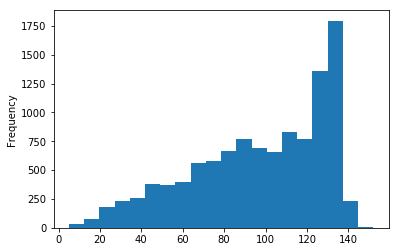

In [81]:
tweets.length.plot(bins=20, kind='hist')

In [82]:
tweets.length.describe()

count    10860.000000
mean        97.100645
std         32.427784
min          5.000000
25%         75.000000
50%        103.000000
75%        127.000000
max        152.000000
Name: length, dtype: float64

In [83]:
print(list(tweets.tweet[tweets.length < 60].index))
print(list(tweets.tweet[tweets.length < 60]))

[5824, 7004, 10292, 8723, 10317, 7427, 10075, 2766, 4152, 105, 5786, 9566, 9892, 2869, 5837, 10376, 6915, 2992, 2665, 10350, 1199, 1060, 347, 8359, 8914, 9540, 5201, 4247, 449, 5229, 7728, 6855, 5297, 8752, 9987, 7152, 9992, 4129, 2971, 9821, 9563, 972, 9274, 10086, 7935, 1461, 9379, 10277, 84, 10331, 1558, 9548, 3816, 8832, 4317, 9000, 5779, 1193, 5710, 8864, 719, 2790, 6160, 6720, 9640, 5393, 161, 2863, 4442, 3741, 480, 586, 34, 3821, 5074, 9551, 8533, 9633, 1566, 9010, 8524, 9267, 7596, 3320, 3044, 7642, 10310, 8127, 3460, 8478, 8581, 1108, 812, 1290, 5941, 4334, 1582, 6637, 2728, 190, 4430, 6394, 1052, 3934, 1514, 2261, 8843, 9291, 9986, 6687, 957, 1983, 3818, 2805, 8475, 2109, 806, 8810, 7202, 8178, 1086, 4973, 7172, 628, 10798, 8187, 5335, 8092, 6004, 3042, 5131, 5172, 3137, 3276, 8355, 10224, 2544, 1099, 2194, 1883, 6635, 3812, 2416, 4665, 8037, 8831, 2708, 5541, 3795, 2242, 1590, 1219, 8737, 2901, 2970, 2082, 5797, 8537, 2969, 8770, 2572, 4859, 4157, 2259, 3931, 5777, 8452, 536

In [72]:
def split_into_tokens(tweet):
    tweet = str(tweet) # convert bytes into proper unicode
    return TextBlob(tweet).words

In [73]:
import nltk
nltk.download('punkt')

tweets.tweet.head().apply(split_into_tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


10276    [3, stars, in, 212, seconds, level, 43, surgeo...
6781     [check, this, out, lightning, reshapes, rocks,...
5824     [nice, job, calgary, transit, http, t, co, rgo...
5968     [arianagrande, girl, you, still, lickin, publi...
8556     [is, the, update, rly, life, now, is, it, is, ...
Name: tweet, dtype: object

In [74]:
import nltk
nltk.download('averaged_perceptron_tagger')

TextBlob("hello world, how is it going?").tags  # list of (word, POS) pairs

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('hello', 'JJ'),
 ('world', 'NN'),
 ('how', 'WRB'),
 ('is', 'VBZ'),
 ('it', 'PRP'),
 ('going', 'VBG')]

In [63]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords

stop = stopwords.words('english')
stop = stop + [u'a',u'b',u'c',u'd',u'e',u'f',u'g',u'h',u'i',u'j',u'k',u'l',u'm',u'n',u'o',u'p',u'q',u'r',u's',u't',u'v',u'w',u'x',u'y',u'z']

In [65]:
import nltk
nltk.download('wordnet')
def split_into_lemmas(tweet):
    tweet = str(tweet).lower()
    words = TextBlob(tweet).words
    # for each word, take its "base form" = lemma 
    return [word.lemma for word in words if word not in stop]

tweets.tweet.head().apply(split_into_lemmas)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amyn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


10276    [3, star, 212, second, level, 43, surgeon, wea...
6781     [check, lightning, reshapes, rock, atomic, lev...
5824     [nice, job, calgary, transit, http, co, rgoguy...
5968     [arianagrande, girl, still, lickin, public, do...
8556     [update, rly, life, scream, vibrates, cant, ha...
Name: tweet, dtype: object

In [76]:
%%time
bow_transformer = CountVectorizer(analyzer=split_into_lemmas).fit(tweets['tweet'])
print(len(bow_transformer.vocabulary_))

26236
Wall time: 5.38 s


In [84]:
tweet4 = tweets['tweet'][5824]
print(tweet4)

nice job calgary transit http t co rgoguyt0lf


In [85]:
bow4 = bow_transformer.transform([tweet4])
print(bow4)

  (0, 4676)	1
  (0, 5508)	1
  (0, 11159)	1
  (0, 12529)	1
  (0, 16051)	1
  (0, 19427)	1
  (0, 23080)	1


In [86]:
%%time
tweets_bow = bow_transformer.transform(tweets['tweet'])
print('sparse matrix shape:', tweets_bow.shape)
print('number of non-zeros:', tweets_bow.nnz)
print('sparsity: %.2f%%' % (100.0 * tweets_bow.nnz / (tweets_bow.shape[0] * tweets_bow.shape[1])))

sparse matrix shape: (10860, 26236)
number of non-zeros: 118573
sparsity: 0.04%
Wall time: 5.73 s


In [101]:
tweets_bow_train = tweets_bow[:8000]
tweets_bow_test = tweets_bow[2876:]
tweets_class_train = tweets['class'][:8000]
tweets_class_test = tweets['class'][2876:]

print(tweets_bow_train.shape)
print(tweets_bow_test.shape)

(8000, 26236)
(7984, 26236)


In [102]:
%time tweet_class = MultinomialNB().fit(tweets_bow_train, tweets_class_train)

Wall time: 27.9 ms


In [105]:
print('accuracy', accuracy_score(tweets_class_test, predictions))
print('confusion matrix\n', confusion_matrix(tweets_class_test, predictions))
print('(row=expected, col=predicted)')

accuracy 0.877755511022
confusion matrix
 [[4185  375]
 [ 601 2823]]
(row=expected, col=predicted)


In [106]:
print(classification_report(tweets_class_test, predictions))

              precision    recall  f1-score   support

Not Relevant       0.87      0.92      0.90      4560
    Relevant       0.88      0.82      0.85      3424

 avg / total       0.88      0.88      0.88      7984



In [114]:
def predict_tweet(new_tweet): 
    new_sample = bow_transformer.transform([new_tweet])
    print(new_tweet, np.around(tweet_class.predict_proba(new_sample), decimals=5),"\n")

predict_tweet('Cat stuck in a tree.')
predict_tweet('Car accident. Major damage to property.')
predict_tweet('I ate a sandwich last night.')
predict_tweet('Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz\'s antic direction calls for hand-waving hysteria.')

Cat stuck in a tree. [[ 0.60273  0.39727]] 

Car accident. Major damage to property. [[ 0.08471  0.91529]] 

I ate a sandwich last night. [[ 0.96413  0.03587]] 

Somehow, Mr. Dreyfuss maintains his sound comic timing even when Frank Oz's antic direction calls for hand-waving hysteria. [[ 0.99823  0.00177]] 



## <span style="color:red">Install Keras and Theano</span>

Keras is a cutting edge neural network library that we will use in weeks 4, 5, and 6. 

In [ ]:
import keras